### Predicting Bank's Term Deposit Subscription - EDA initial

#### Author: Guansu(Frances) Niu

#### Data Resource: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:
# Imports:

import math as ma
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
from matplotlib import pylab as plt

In [3]:
# Remove warnings:

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [5]:
# Read dataset:

df = pd.read_csv("data/raw data.csv",sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
# Collect various features:

onehot_ftrs = ['job', 'marital', 'default', 'housing','loan', 'contact','poutcome']

ordinal_ftrs = ['education','month','day_of_week']

ordinal_cats = [['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 
                'university.degree','missing'],['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct',
                'nov','dec'],['mon', 'tue', 'wed', 'thu', 'fri']]

num_ftrs = ['age','duration','campaign','previous','pdays','emp.var.rate','cons.price.idx','cons.conf.idx', 
                 'euribor3m','nr.employed']

#### Continuous features and categorical label (Boxplot):

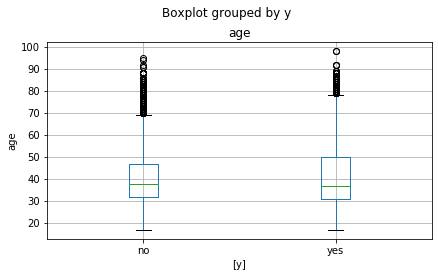

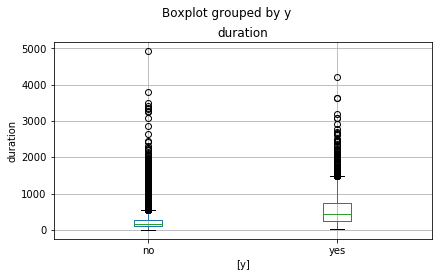

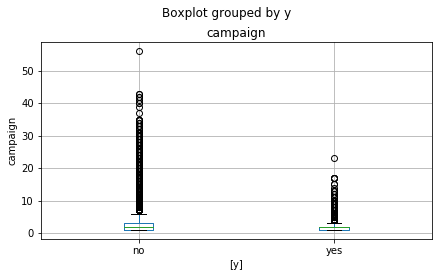

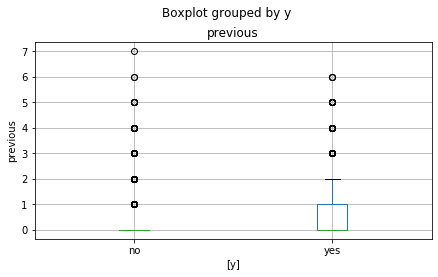

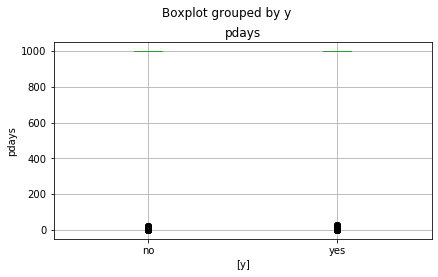

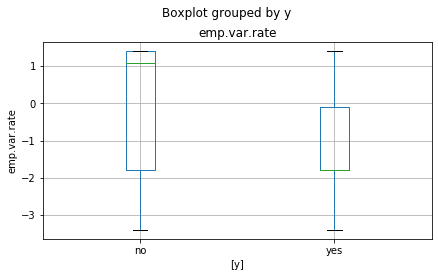

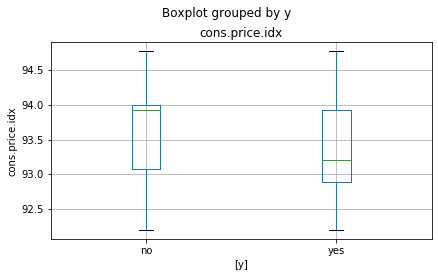

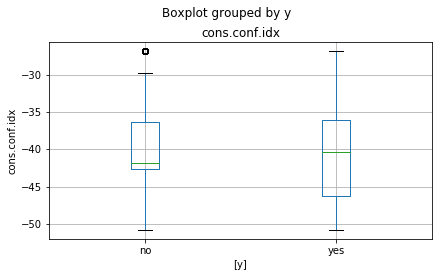

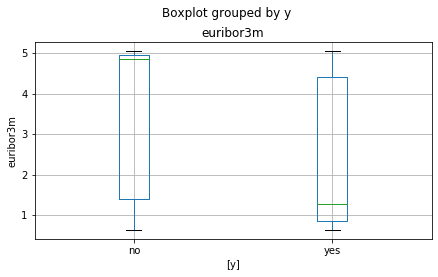

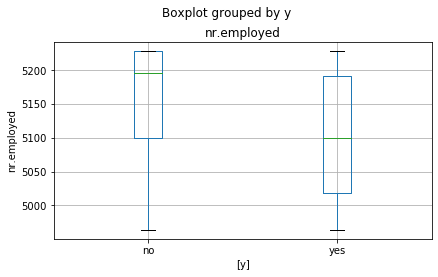

In [5]:
for i in range(len(num_ftrs)):
    df[[num_ftrs[i],'y']].boxplot(by='y')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.ylabel(num_ftrs[i])
plt.show()

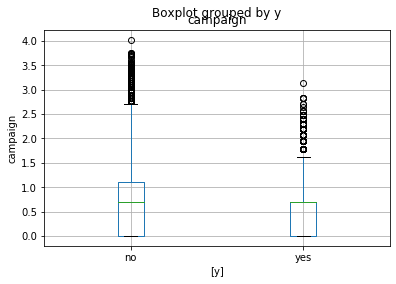

In [6]:
# Take log on 'campaign':

df['campaign'] = np.log(df['campaign'])
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
df[['campaign','y']].boxplot(by='y')
plt.ylabel('campaign')
plt.show()

#### Categorical features and categorical label (Stacked bar plot):

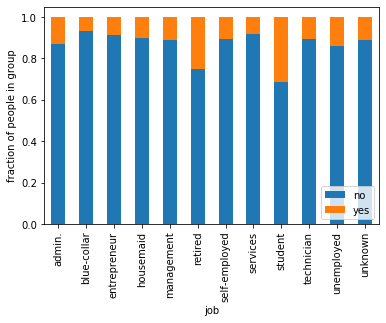

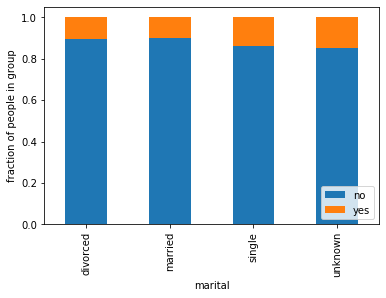

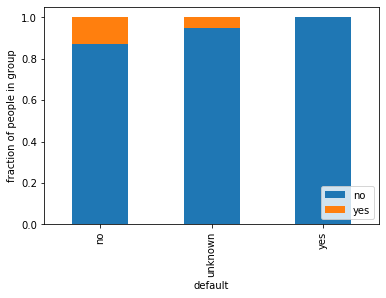

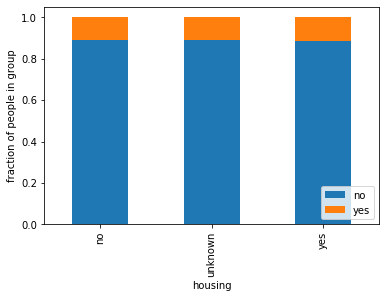

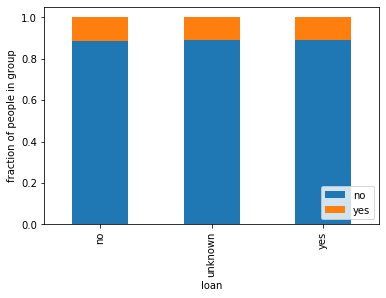

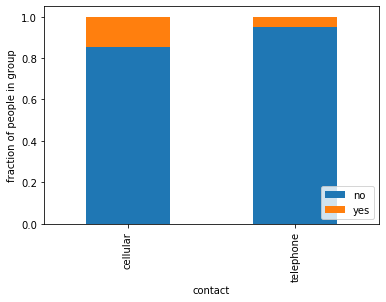

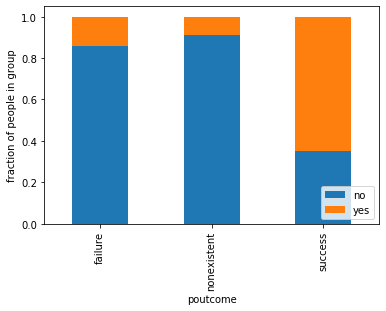

In [7]:
# Onehot ftrs:

for i in range(len(onehot_ftrs)):

    count_matrix = df.groupby([onehot_ftrs[i], 'y']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.ylabel('fraction of people in group')
    plt.legend(loc=4)

plt.show()

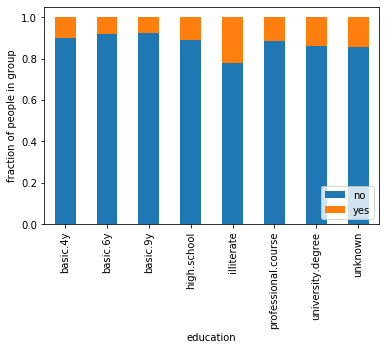

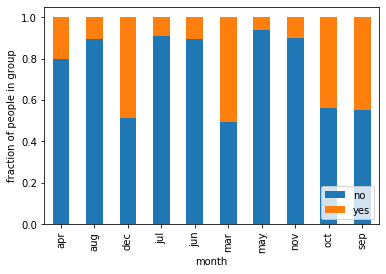

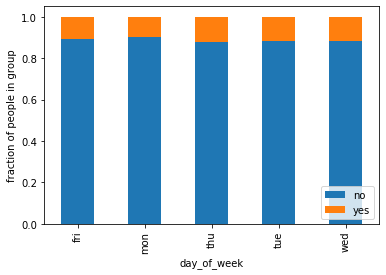

In [10]:
# Ordinal ftrs:

for i in range(len(ordinal_ftrs)):

    count_matrix = df.groupby([ordinal_ftrs[i], 'y']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.ylabel('fraction of people in group')
    plt.legend(loc=4)

plt.show()

#### Balance of Target variable(binary):

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object


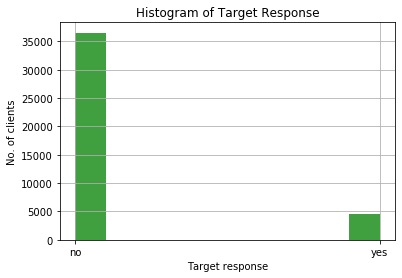

In [63]:
# Target Response: 

y = df['y']
print(y.describe())

n, bins, patches = plt.hist(y, density=False, facecolor='g', alpha=0.75, align = 'mid')
plt.xlabel('Target response')
plt.ylabel('No. of clients')
plt.title('Histogram of Target Response')
plt.grid(True)
plt.show()

#### Categorization:

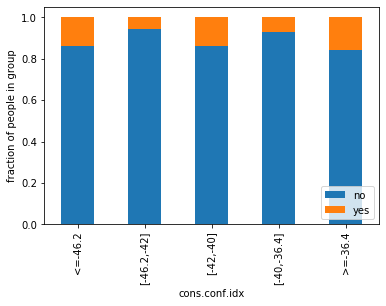

In [16]:
# 'cons.conf.idx':

df = pd.read_csv("data/raw data.csv",sep=';')
df['cons.conf.idx'] = pd.cut(df['cons.conf.idx'],bins=[-60,-46.2,-42,-40,-36.4,-30],
                             labels=["<=-46.2", "[-46.2,-42]", "[-42,-40]", "[-40,-36.4]",">=-36.4"])
count_matrix = df.groupby(['cons.conf.idx', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)

plt.show()

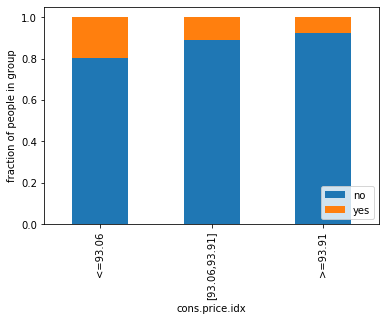

In [18]:
# 'cons.price.idx':

df = pd.read_csv("data/raw data.csv",sep=';')
df['cons.price.idx'] = pd.cut(df['cons.price.idx'],bins=[90,93.06,93.91,95],
                             labels=["<=93.06", "[93.06,93.91]", ">=93.91"])
count_matrix = df.groupby(['cons.price.idx', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)

plt.show()

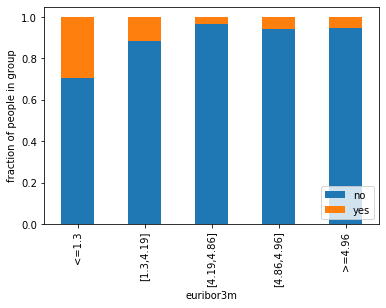

In [13]:
# 'euribor3m':

df = pd.read_csv("data/raw data.csv",sep=';')
df['euribor3m'] = pd.cut(df['euribor3m'],bins=[0.6,1.3,4.19,4.86,4.96,5.1],
                             labels=["<=1.3", "[1.3,4.19]", "[4.19,4.86]", "[4.86,4.96]",">=4.96"])
count_matrix = df.groupby(['euribor3m', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)

plt.show()